<a href="https://colab.research.google.com/github/maha-s170071/Signature-Forgery-Verification-using-CNN/blob/main/Copy_of_ST_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Mar 31 06:47:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |    373MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
g_path="/content/drive/MyDrive/Datasets/signature_dataset/forgeries"


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[30]:


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

root_path="/content/drive/MyDrive/Datasets/signature_dataset/"

forg_list=[]
gen_list=[]

[forg,gen] = os.listdir(root_path)   
for img in os.listdir(root_path+forg):
    forg_list.append(img)
for img in os.listdir(root_path+gen):
    gen_list.append(img)


# In[31]:


# img=cv2.imread("C:/Users/2662a/Desktop/laya_dataset/genuines/NFI-00101001.png")
# plt.imshow(img)


# In[32]:


# img=cv2.imread("C:/Users/2662a/Desktop/laya_dataset/forgeries/NFI-00301018.png")
# plt.imshow(img)


# In[33]:


data=[]
lables=[]


# In[34]:


for img_name in forg_list:
    image=cv2.imread(root_path+forg+'/'+img_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    lables.append(1)


# In[35]:


for img_name in gen_list:
    image=cv2.imread(root_path+gen+'/'+img_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    lables.append(0)


# In[36]:


data=np.array(data)
lables=np.array(lables)


# In[37]:


data=data/255.0


# In[38]:


from sklearn.model_selection import train_test_split


# In[39]:


d_train,d_test,y_train,y_test=train_test_split(data,lables,test_size=0.2,shuffle=True)


# In[40]:


y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)


# In[41]:


y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)


# In[42]:


# Model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam


# In[43]:


In [ ]:


cnn= Sequential()

cnn.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
cnn.add(MaxPooling2D(3,3))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(128,activation = 'relu'))
cnn.add(Dropout(rate=0.3))
cnn.add(Dense(2,activation = 'softmax'))
cnn.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
cnn.summary()


# In[44]:


model= cnn.fit(d_train,y_train,epochs=10,validation_split=.05)


# In[46]:





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

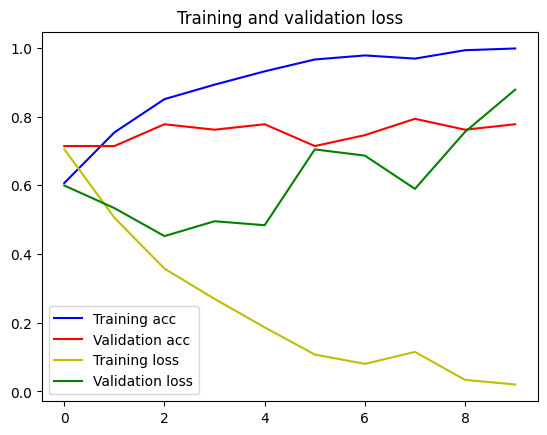

10/10 [==============================] - 1s 47ms/step


0.8498402555910544

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
plt.figure()


# In[47]:


y_pred = cnn.predict(d_test)


# In[62]:


from sklearn.metrics import accuracy_score


# In[60]:


y_pred=to_categorical(y_pred.argmax(axis=1),num_classes=2)


# In[63]:


accuracy_score(y_pred, y_test)


# In[ ]:




In [ ]:
from keras.models import save_model
save_model(cnn, "/content/drive/MyDrive/Model/sv_model.h5")

# **Model** **testing**

In [ ]:
#testing the model

In [ ]:
from keras.models import load_model
cnn_model=load_model("/content/drive/MyDrive/Model/sv_model.h5")

In [ ]:
print(d_train.shape)
print(y_train.shape)

NameError: ignored

In [ ]:
import os
import cv2
import numpy as np
ls=[]
pr="/content/drive/MyDrive/Datasets/sig_person_face/"
for img in os.listdir(pr):
  sample_image=cv2.imread(pr+img)
  sample_image= cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
  sample_image = cv2.resize(sample_image, (224, 224))
  ls.append(sample_image)

In [ ]:
y_true=np.array([0,0,0,0,0,1,1,1,1,1])

In [ ]:
ls=np.array(ls)

In [ ]:
ls.shape

(10, 224, 224, 3)

In [ ]:
sample_prob=cnn_model.predict(ls)

NameError: ignored

In [ ]:
sample_pred=np.argmax(sample_prob,axis=1)

In [ ]:
sample_pred

NameError: ignored

In [ ]:
# import pandas as pd
# data = {
#   "person_id": ["NFI-00101001","NFI-00202002","NFI-00301002","NFI-00301003",
#                 'NFI-00301018','NFI-00301035','NFI-00301046','NFI-00302002',
#                 'NFI-00401004','NF1-00608006'],
#   "y_true": [0,0,0,0,0,1,1,1,1,1],
#   "sample_pred":[0,0,0,0,0,1,1,1,1,1]
# }

In [ ]:
# da=pd.DataFrame(data)

NFI-00202002.png genuine
NFI-00301003.png genuine
NFI-00401004.png genuine
NFI-00101001.png genuine
NFI-00608006.png genuine


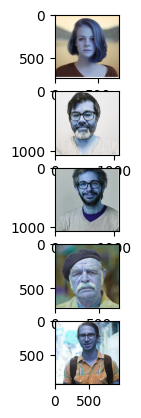

In [ ]:
import matplotlib.pyplot as plt
person_id=os.listdir("/content/drive/MyDrive/Datasets/sig_person_face/")
gen_path="/content/drive/MyDrive/Datasets/person_face/"

genuine_imgs=[]
g_img=[]
for img in person_id:
  if img in os.listdir(gen_path):
    genuine_imgs.append(gen_path+img)
    g_img.append(img)

for i in range(len(genuine_imgs)):
  plt.subplot(len(genuine_imgs),1,i+1)
  img=cv2.imread(genuine_imgs[i])
  plt.imshow(img)
  print(g_img[i],'genuine')

In [ ]:
list1=[]
s_image=cv2.imread("/content/drive/MyDrive/Datasets/sig_person_face/NFI-00301046.png")
s_image= cv2.cvtColor(s_image, cv2.COLOR_BGR2RGB)
s_image = cv2.resize(s_image, (224, 224))
list1.append(s_image)
list1=np.array(list1)
s_prob=cnn_model.predict(list1)
s_pred=np.argmax(s_prob,axis=1)
if (s_pred==[0]):
  print('genuine')
  gen_face=cv2.imread("/content/drive/MyDrive/Datasets/person_face/NFI-00301046.png")
  plt.imshow(gen_face)
else:
  print("forgerie")

1/1 [==============================] - 0s 21ms/step
forgerie
